<h3> SciPython/Practical_classes_1

<h3> Linear algebra

In [1]:
import numpy as np 
import math
import matplotlib.pyplot as plt
from scipy.stats import norm 
from math import pi, e

In [ ]:
#let's define a vector v

v = np.array([3,0,-4])
print(v)

[ 3  0 -4]


In [ ]:
#length of the vector

len_v = np.linalg.norm(v)
print(len_v)

5.0


In [ ]:
#operations on vectors

v1 = np.array([1,2,5])
v2 = np.array([-5,0,-1])

print(v1+v2, v1-v2, 3*v1)

[-4  2  4] [6 2 6] [ 3  6 15]


In [ ]:
#dot product
np.dot(v1,v2) 

-10

In [ ]:
#linear dependence 

a = np.array([8, 1, 4])
b = np.array([1,7,8])
c = np.array([2,3,4])

a == -2*b+5*c #a = -2*b + 5*c??

array([ True,  True,  True])

<h4> Exercise1: Check whether vectors $x_1 = [3,1, -2,4]$ and $x_2=[-1,3,4,2]$ are orthogonal.

In [ ]:
# exercise 1
x1 = np.array([3,1,-2,4])
x2 = ([-1,3,4,2])

np.dot(x1, x2) == 0

# if the dot product between two vectors is 0, they are orthogonal

True

In [ ]:
#matrices
A = np.array([[2,3],[1,2]]); B = np.array([[1,1], [2,3]])

In [ ]:
print(np.transpose(A))

[[2 1]
 [3 2]]


In [ ]:
print(A+B)

[[3 4]
 [3 5]]


In [ ]:
print(np.dot(A,B)) #A*B

[[ 8 11]
 [ 5  7]]


In [ ]:
#inverse of a matrix
A_inv = np.linalg.inv(A)

print(A_inv)

[[ 2. -3.]
 [-1.  2.]]


<h4> Exercise2: Check whether the matrix above is in fact, the inverse of $A$ by calculating $A\cdot A^{-1}$. What should you obtain?

In [ ]:
# exercise 2
identity = np.array([[1,0],[0,1]])

np.dot(A, A_inv) == identity

# since the result of A times A-1 is the identity 2x2 matrix,
# A-1 is indeed the inverse of A

array([[ True,  True],
       [ True,  True]])

<h4> Exercise3: Define two square matrices $A$ and $B$ and calculate $A\cdot B+B^T$.
    
    
$$A = \begin{bmatrix} 1 & 2 & 1 \\ 3 & 0 & 1 \\ 0 & 2 & 4 \end{bmatrix}$$, $$B = \begin{bmatrix} -1 & 0 & 1 \\ 2 & 1 & 0 \\ 3 & -2 & 1 \end{bmatrix}$$

In [ ]:
# exercise 3
A = np.array([[1, 2, 1], [3, 0, 1], [0, 2, 4]])
B = np.array([[-1, 0, 1], [2, 1, 0], [3, -2, 1]])

A_times_B = np.dot(A, B)
B_transposed = np.transpose(B)

result = A_times_B + B_transposed

In [ ]:
result

array([[ 5,  2,  5],
       [ 0, -1,  2],
       [17, -6,  5]])

<h3> Simple plots

In [ ]:
import matplotlib.pyplot as plt

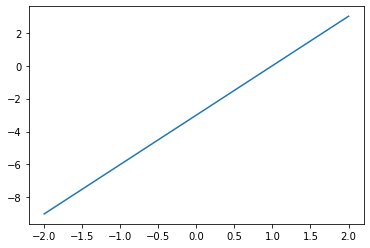

In [ ]:
#simple plots (continuous line)
x = np.linspace(-2,2,10) #domain, from -2 to 2, 10 numbers   
y = 3*x-3           #function

plt.plot(x,y)
plt.show()

In [ ]:
x

array([-2.        , -1.55555556, -1.11111111, -0.66666667, -0.22222222,
        0.22222222,  0.66666667,  1.11111111,  1.55555556,  2.        ])

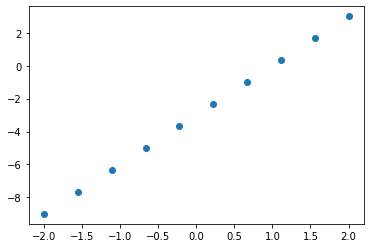

In [ ]:
#simple plots (scattter plot)
plt.scatter(x,y)
plt.show()

<h4> Exercise4: For the example above, what is the $cov(X,Y)$?. According to this matrix, calculate the correlation coefficient. How to interpret its value?

In [ ]:
# exercise 4
# cov(X, Y) = 5.43209877

x = np.linspace(-2,2,10) #domain, from -2 to 2, 10 numbers   
y = 3*x-3           #function

cov_matrix = np.cov(x,y) #covariance matrix for variables X and Y

cov = cov_matrix[0,1]
var_x = cov_matrix[0,0]
var_y = cov_matrix[1,1]
sqrt = math.sqrt(var_x*var_y)

cor = cov/sqrt

cor
# cor = 0.9999999999999999
# that would mean X and Y strongly vary together with the same tendency

In [ ]:
cor

0.9999999999999999

<h4> Exercise5: Generate 100 pair numbers $(x,y)$, where $x$ if from the range $<2,5>$ and $y$ is created according to the formula $y=x^3+5x$. Plot the graph. Calculate the covariance matrix. What is the $cov(X,Y)$ and the correlation coefficient?

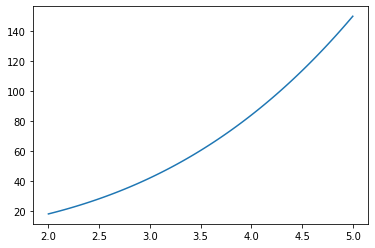

In [ ]:
# exercise 5

x = np.linspace(2,5,100) #domain, from 2 to 5, 100 numbers   
y = x**3 + 5*x           #function

# plt.plot(x,y)
# plt.show()

cov_matrix = np.cov(x,y) #covariance matrix for variables X and Y

# cov = 3.33320783e+01
cov = cov_matrix[0,1]
var_x = cov_matrix[0,0]
var_y = cov_matrix[1,1]
sqrt = math.sqrt(var_x*var_y)

cor = cov/sqrt

cor
# cor = 0.9822504061402934

0.9822504061402934

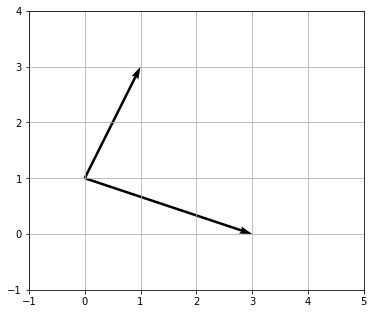

In [ ]:
#vectors on a plane

X = np.array([0,0]) 
Y = np.array([1,1])
U = np.array([1,3]) 
V = np.array([2,-1]) 

fig, ax = plt.subplots(figsize=(6, 6))
ax.quiver(X, Y, U, V, units='xy' ,scale=1)
ax.grid()
plt.xlim(-1,5)
plt.ylim(-1,4)
ax.set_aspect('equal')
plt.show()

<h4> Exercise6: To rotate a vector $v$ one may multiply it by $$A = \begin{bmatrix} \cos \theta & \sin \theta \\ -\sin \theta & \cos \theta  \end{bmatrix}$$ where $\theta$ is an angle of rotation. Define a vector $[-3,4]$ which starts in the origin of coordiantes. Rotate it ($\theta = 30^o$) and plot both vectors.

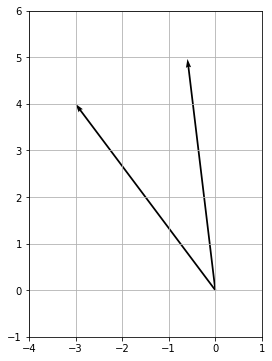

In [ ]:
# exercise 6

# angle and transformation matrix
angle = math.radians(30)
a_cos = math.cos(angle)
a_sin = math.sin(angle)

A = np.array([[a_cos, -a_sin], [a_sin, a_cos]])

# original vector 
v = np.array([-3, 4])
# new vector
v2 = np.dot(v, A)

# plotting
X = np.array([0, 0]) 
Y = np.array([0, 0]) 
V = np.array([v[0], v2[0]])
U = np.array([v[1], v2[1]])

fig, ax = plt.subplots(figsize=(6, 6))
ax.quiver(X, Y, V, U, units='xy' ,scale=1)
ax.grid()
plt.xlim(-4,1)
plt.ylim(-1,6)
ax.set_aspect('equal')
plt.show()

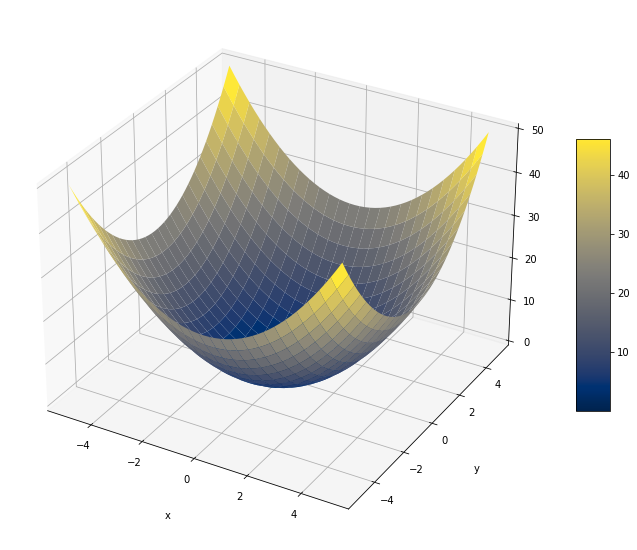

In [ ]:
#3D PLOTS

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(-5, 5.1, 0.2)
y = np.arange(-5, 5.1, 0.2)

X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

<h3> Probability

In [ ]:
import statistics
print(dir(statistics))

['Counter', 'Decimal', 'Fraction', 'NormalDist', 'StatisticsError', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_coerce', '_convert', '_exact_ratio', '_fail_neg', '_find_lteq', '_find_rteq', '_isfinite', '_normal_dist_inv_cdf', '_ss', '_sum', 'bisect_left', 'bisect_right', 'erf', 'exp', 'fabs', 'fmean', 'fsum', 'geometric_mean', 'groupby', 'harmonic_mean', 'hypot', 'itemgetter', 'log', 'math', 'mean', 'median', 'median_grouped', 'median_high', 'median_low', 'mode', 'multimode', 'numbers', 'pstdev', 'pvariance', 'quantiles', 'random', 'sqrt', 'stdev', 'tau', 'variance']


Normal distribution is very often used to model some features. It has two parameters $\mu$ and $\sigma$ and PDF is given by $f(x) = \frac{1}{\sigma \sqrt{2 \pi}}\cdot e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

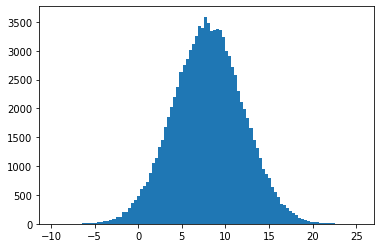

In [ ]:
y = np.random.normal(8, 4, 100000) #generate 10K numbers from N(8,4) 

plt.hist(y, bins = 100)
plt.show()

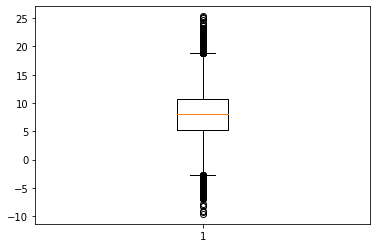

In [ ]:
#boxplot
plt.boxplot(y)
plt.show()

In [ ]:
statistics.mean(y), statistics.stdev(y) #mean and standard deviation

(8.011852588438094, 4.004643740466761)

In [ ]:
statistics.median(y) #median

8.005315652044983

In [ ]:
statistics.quantiles(y) #quantiles

[5.309937186144414, 8.005315652044983, 10.704465230157536]

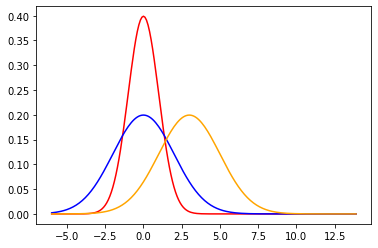

In [ ]:
from math import pi, e

def f(x, mu = 0, sigma = 1):
    return (1/(sigma*(2*pi)**0.5))*e**(-((x-mu)**2)/(2*sigma**2))

x = [-6+0.1*i for i in range(200)]

y1 = [f(elem) for elem in x]  #N(0,1)
y2 = [f(elem, sigma = 2) for elem in x]   #N(0,2)
y3 = [f(elem, mu=3, sigma = 2) for elem in x]  #N(3,2)

plt.plot(x,y1, c = "red")
plt.plot(x,y2, c = "blue")
plt.plot(x,y3, c = "orange")
plt.show()

<h4> CDF: $F(t) = P(X \leq t)$

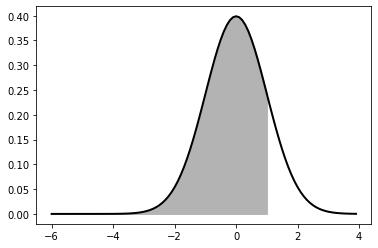

In [ ]:
def f(x, mu = 0, sigma = 1):
    return (1/(sigma*(2*pi)**0.5))*e**(-((x-mu)**2)/(2*sigma**2))

x = [-6+0.1*i for i in range(100)]
y1 = [f(elem) for elem in x]  #N(0,1)

plt.plot(x,y1, "k-", lw=2)

z = np.linspace(0 - 4*1, 1,100)
plt.fill_between(z,0, f(z), color = "0.7")
plt.show()

In [ ]:
from scipy.stats import norm 

norm.cdf(2) #F(2) for X~N(0,1)

0.9772498680518208

In [ ]:
help(norm.cdf)

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(x, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Cumulative distribution function of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    cdf : ndarray
        Cumulative distribution function evaluated at `x`



In [ ]:
norm.cdf(2, loc =1, scale = 3) #F(2) for X~N(1,3)

0.6305586598182363

<h4> Exercise7: Given a random variable $X \sim N(0,1)$ calculate $P(X<1)$, $P(X>1)$ and $P(-1<X<2)$.

In [ ]:
# exercise 7
# X∼N(0,1)

# p1 = P(X<1)
# P(X<=1???)
p1 = norm.cdf(1)

# p2 = P(X>1)
p2 = 1 - norm.cdf(1)

# P(−1<X<2)
# P(-1<X<=2 ??)
p3 = norm.cdf(2) - norm.cdf(1)

print(p1, p2, p3)

0.8413447460685429 0.15865525393145707 0.13590512198327787


<h4> Exercise8: Suppose in a given population the height may be described as a random variable $X \sim N(170, 10)$. What is the percent of people who have the height between 160 and 190?

In [ ]:
# exercise 8
# p1 = P(160 < X < 190)
p1 = norm.cdf(190, 170, 10) - norm.cdf(160, 170, 10)
p1

0.8185946141203637

<h3> Multivariate normal distribution

<h4> Exercise9: Define a PDF for 2D normal distribution given by $f(X) = \frac{1}{2\pi\sqrt{\det(\Sigma)}}\cdot \exp(-\frac{1}{2}(X-\mu)^T\Sigma^{-1}(X-\mu))$, where $X = [X_1, X_2]$, $\mu = [\mu_1,\mu_2]$ and $\Sigma$ is a covariance matrix. Both $\mu$ and $\Sigma$ are parameters.

In [7]:
# exercise 9
def f2(x, matrix, mu = np.array([0,0])):
    det = np.linalg.det(matrix)
    sqrt = math.sqrt(det)
    transposed = np.transpose(x-mu)
    inversed_matrix = np.linalg.inv(matrix)

    t_i_dot = np.dot(transposed, inversed_matrix)

    sub = x - mu

    dot_product = np.dot(t_i_dot, sub)

    exp = math.exp(-1/2 * dot_product)

    return (1/(2*pi*sqrt)*exp)

<h4> Exercise10: Plot 2D PDF for a normal distribution with $\mu=[1,2]$ and $$\Sigma = \begin{bmatrix} 1 & 1.1 \\ 1.1 & 4  \end{bmatrix}$$

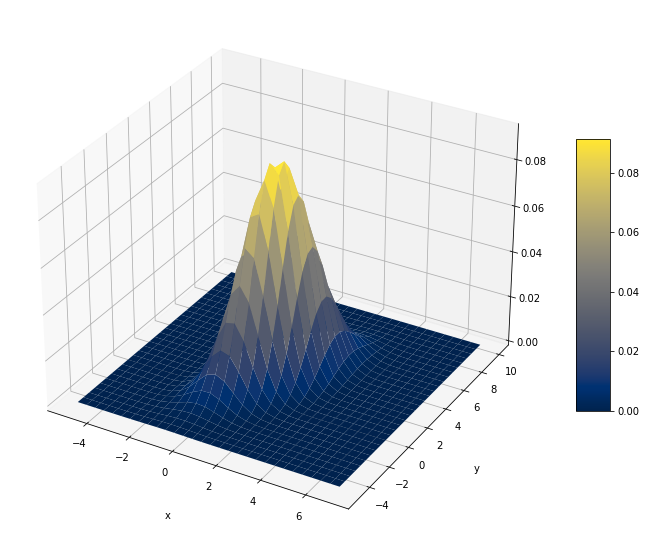

In [14]:
# exercise 10

matrix = np.array([[1, 1.1], [1.1, 4]])
mu = np.array([1,2]) 

# 3D plots
fig = plt.figure(figsize = (12, 10))
ax = plt.axes(projection='3d')

N = 30
x = np.linspace(-5, 7, N)
y = np.linspace(-5, 10, N)

X, Y = np.meshgrid(x, y)

# generate data by entering the input from X and Y in the 
# function created in exercise 9

Z = np.empty([N, N])
for i in range(N):
    for j in range(N):
        Z[i,j] = f2(np.array([X[i,j], Y[i,j]]), matrix, mu)

# plotting the 3 axes
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [ ]:
#how to generate observations (X1, X2) from such as distribution
means = np.array([1,2])
sigma_cov = np.array([[1,1.1],[1.1,4]])
data = np.random.multivariate_normal(means, sigma_cov, 2) #generate 10 pairs (x,y) from 2D normal distribution
